# Basic Demonstration of cEpiabm driven from Python

In [52]:
from epiabm import *
import time

## Initialization

In [53]:
LogFile.Instance().configure(2, "output/log.log") # Set logger to print warnings and above to console

### Load parameters to a SimulationConfig
cfg = JsonFactory().load_config("parameters.json")

### Create a toy population
# Create a population with 100,000 people split between 100 cells. Each cell has 100 microcells and each microcell has 50 households
population = None # Remove reference to old population if it exists (for testing, population constructor and destructor print to terminal)
population = ToyPopulationFactory().make_population(100000, 10, 100, 50, 0)
population.initialize()

### Randomly initialize 1 in 10000 people as infected
r = RandomSeedSweep(cfg, 10000)
r.bind_population(population)
r(0)

Created Population


## Configure a Simulation

In [54]:
simulation = BasicSimulation(population) # Create a simulation acting on the population

# Configure which sweeps to run
simulation.add_sweep(HouseholdSweep(cfg))
simulation.add_sweep(SpatialSweep(cfg))
simulation.add_sweep(NewInfectionSweep(cfg))
simulation.add_sweep(HostProgressionSweep(cfg))

# Configure what data to output
simulation.add_timestep_reporter(
    PopulationCompartmentReporter("output/population_results.csv"))

# Run Simulation
simulation.simulate(200)

Deleted Population


In [55]:
import pandas as pd
results = pd.read_csv("output/population_results.csv")

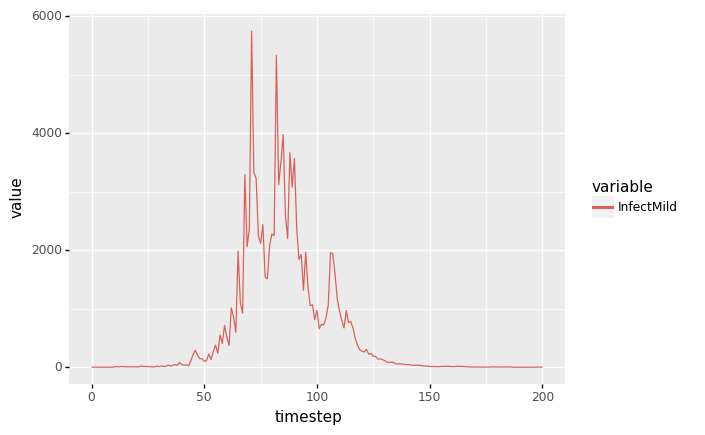

<ggplot: (8735053570094)>

In [56]:
from plotnine import *
(
    ggplot(results[['timestep', 'InfectMild']].melt('timestep'), aes(x='timestep', y='value', colour='variable')) +
    geom_line()
)

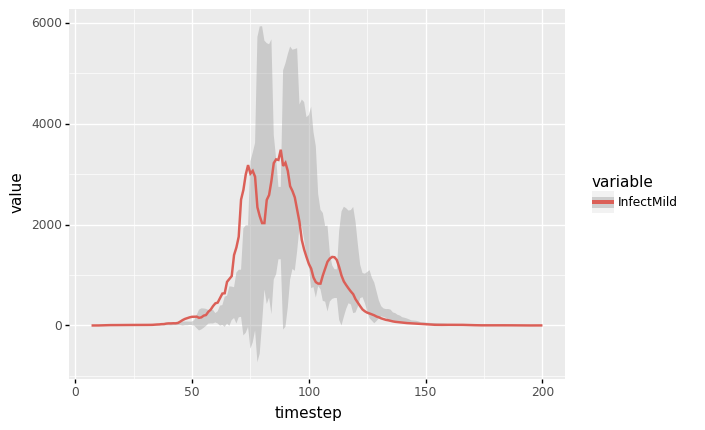

<ggplot: (8735053446644)>

In [57]:
from plotnine import *
(
    ggplot(results[['timestep', 'InfectMild']].melt('timestep'), aes(x='timestep', y='value', colour='variable')) +
    geom_smooth(method='mavg',method_args={'window':7})
)

In [58]:
c = population.cells()[1]
c.location()

(0.25, 0.0)